# KI - Projekt: Evidenztheorie

Anhand von Sensor-Daten soll kassifiziert werden, ob es sich bei dem vermessenen Objekt um einen PKW, einen LKW, ein Motorrad oder ein Fahrrad handelt.
<br>
Folgende Kategorien werden unterschieden: <br>

| <b>KFZ-Art<b> | <b>Geschwindigkeit</b> | <b>Beschleunigung</b>| <b>Höhe</b> | <b>Breite</b> |
| --------------|------------------------|----------------------|-------------|-------------- |
| <b>Fahrrad</b> | Langsam | - | hoch | schmal |
| <b>PKW</b> | Mittel | - | flach | breit |
| <b>LKW</b> | Mittel | - | hoch | breit |
| <b>Motorrad</b> | Mittel | Stark | hoch | schmal |

- Mittlere Geschwindigkeit zwischen 50 und 90 km/h.

## Schritte / Methoden:
1. Daten einlesen und explorieren.
2. Grenzwerte für 'hoch', 'flach', 'starke Beschleunigung', ... berechnen.
3. Einzelne Datensequenzen einlesen und Fahrzeugart mithilfe von `python_evidence`-Framework bestimmen.
  1. Werte (Geschw., Beschl., ...) bestimmen.
  2. Evidenz-Messung (+ Wahrscheinlichkeiten) festlegen.
  3. Fahrzeugart bestimmen.

## Hinweis
- Sensoren arbeiten auf hohen Entfernungen ungenauer:
  - Mögliche Fehlerquelle, möglicherweise korrigieren / einberechnen.

In [1]:
# Imports
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np

from IPython.display import display

from python_evidence.dempster_handler import DempsterHandler, Measure
from utils import load_data, change_data, get_velocity, get_acceleration, save_data_dict, get_dimensions

# Schritt 1: Daten einlesen und explorieren

--------------------------------------------------

Daten befinden sich in Form von CSV Dateien im [data](/data)-Ordner.

Sie bestehen aus jeweils einzelnen Mess-Sequenzen für ein Fahrzeug. Die Messdaten bestehen aus:
- t
  - Zeitpunkte (Messung alle 100ms)
- Eigengeschwindigkeit(m/s)
- Bbox_Breite
- Bbox_Höhe
- Bbox_links_unten_y
- Abstand(m)

In [2]:
"""
TODO:
    * Daten laden / explorieren.

    * Geschwindigkeiten von m/s in km/h.
    * Beschleunigung.
    * Höhe / Breite.
    
    * Grenzwerte berechnen.

    * Evidenztheorie für einzelne CSV Dateien.
"""

DATA_FOLDER = Path("data")
CSV_FILES = ["DPE15_1.csv", "DPE15_2.csv", "DPE15_3.csv", "DPE15_4.csv", 
             "DPE16_1.csv", "DPE16_2.csv", "DPE16_3.csv", "DPE16_4.csv"]

for ix, path in enumerate(CSV_FILES):
    CSV_FILES[ix] = DATA_FOLDER.joinpath(path)

# Daten laden.
data_dict = load_data(CSV_FILES)

# Datensatz explorieren.
df = data_dict["DPE15_1"]
display(df)

print(df.info())

"""
TODO:
    * Eigengeschwindigkeit zu floats
    * Gechwindigkeit m/s in km/h.
    * Abstand(m) zu floats.
    * Beschleunigung.
    * Höhe / Breite.
"""
change_data(data_dict)

# print(data_dict["DPE15_1"].info())
# display(df)

# Geschwindigkeiten / Acceleration vom anderen Fahrzeug
for path, df in data_dict.items():
    print(path)
    print("--------------------------")
    get_velocity(df)
    get_dimensions(df)
    print("\n\n")

print(data_dict["DPE16_2"].info())
display(data_dict["DPE16_2"])


,t,Eigengeschwindigkeit(m/s),Bbox_Breite,Bbox_Höhe,Bbox_links_unten_y,Abstand(m)
0,0,"16,1",61,121,142,71
1,"0,1","16,1",64,128,141,"70,5"
2,"0,2",16,64,127,138,69
3,"0,3","16,1",66,131,138,69
4,"0,4",16,67,134,137,"68,5"
...,...,...,...,...,...,...
99,"9,9","16,1",181,362,22,11
100,10,"16,2",183,366,20,10
101,"10,1","16,1",183,365,18,9
102,"10,2","16,1",230,374,18,9


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   t                          104 non-null    object
 1   Eigengeschwindigkeit(m/s)  104 non-null    object
 2   Bbox_Breite                104 non-null    int64 
 3   Bbox_Höhe                  104 non-null    int64 
 4   Bbox_links_unten_y         104 non-null    int64 
 5   Abstand(m)                 104 non-null    object
dtypes: int64(3), object(3)
memory usage: 5.0+ KB
None
DPE15_1
--------------------------



DPE15_2
--------------------------



DPE15_3
--------------------------



DPE15_4
--------------------------



DPE16_1
--------------------------



DPE16_2
--------------------------



DPE16_3
--------------------------



DPE16_4
--------------------------



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 10 co

,t,Eigengeschwindigkeit(m/s),Bbox_Breite,Bbox_Höhe,Bbox_links_unten_y,Abstand(m),v(m/s),v(km/h),width,height
0,0.0,22.0,304,226,87,43.5,22.05,79.38,1.955,1.565
1,0.1,22.1,276,227,87,43.5,22.05,79.38,1.815,1.570
2,0.2,22.1,279,230,87,43.5,22.10,79.56,1.830,1.585
3,0.3,22.0,287,236,86,43.0,17.05,61.38,1.865,1.610
4,0.4,22.2,283,233,86,43.0,22.10,79.56,1.845,1.595
...,...,...,...,...,...,...,...,...,...,...
99,9.9,22.0,106,87,157,78.5,17.10,61.56,1.315,1.220
100,10.0,22.1,104,85,159,79.5,32.05,115.38,1.315,1.220
101,10.1,22.0,126,77,162,81.0,37.05,133.38,1.440,1.195
102,10.2,22.1,101,83,161,80.5,17.05,61.38,1.310,1.220


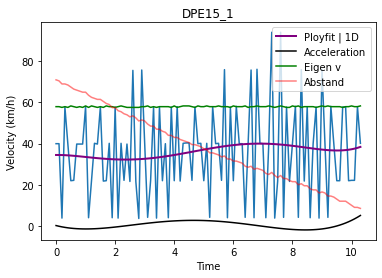

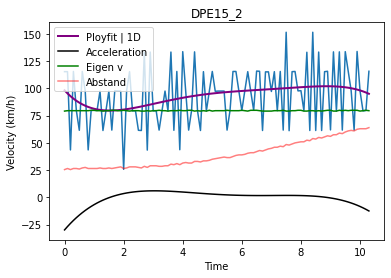

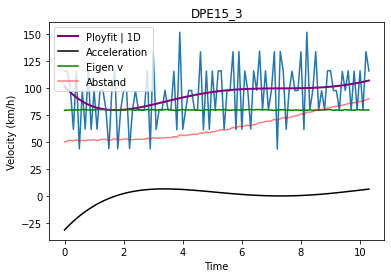

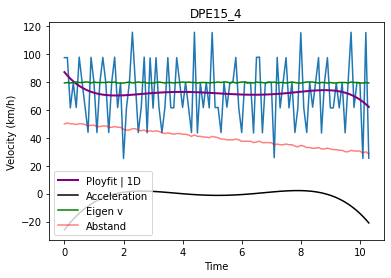

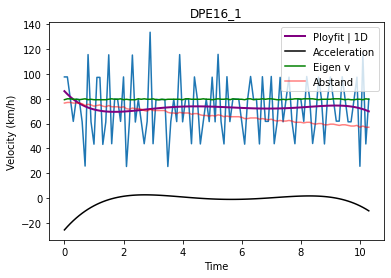

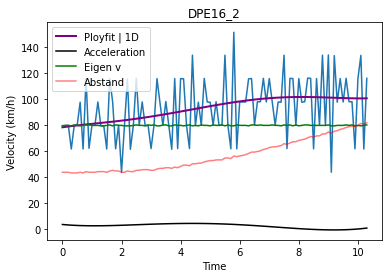

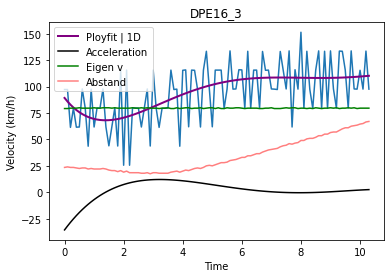

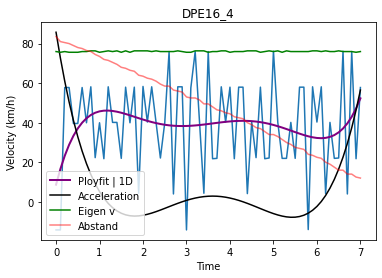

In [3]:
# plot calculated velocity and acceleration
for path, df in data_dict.items():
    plt.title(path)
    plt.ylabel("Velocity (km/h)")
    plt.xlabel("Time")
    name = "v(km/h)"

    # Real plots
    plt.plot(df["t"], df[name])

    dimensions = 5
    model = np.poly1d(np.polyfit(df["t"], df[name], dimensions))
    plt.plot(df["t"], model(df["t"]), linewidth=2, color="purple", label="Ployfit | 1D")
    
    df["v(km/h) polyfit"] = model(df["t"])

    get_acceleration(df, model)
    plt.plot(df["t"], df["a(km/h^2)"], color="black", label="Acceleration")

    plt.plot(df["t"], df["Eigengeschwindigkeit(m/s)"]  * 3.6, color="green", label="Eigen v")

    plt.plot(df["t"], df["Abstand(m)"], color="red", alpha=0.5, label="Abstand")
    plt.legend()
    plt.show()

# Save data
save_data_dict(data_dict, Path("updated_data"))

32.241833172157044 39.99136178949391
-1.9628057453475334 5.0649679961258

Höhe : Breite  1.9450248203304439
Höhe : Abstand  6.63348073278585
Breite : Abstand  3.410486418193304
__
1.6426442307692306 1.0294230769230768


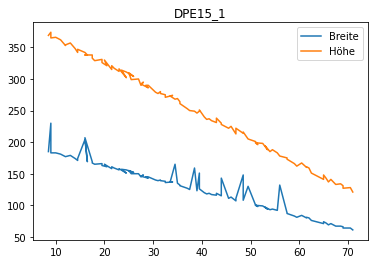

79.69224772307527 102.00547678003407
-29.872863194122672 6.0080216389366825

Höhe : Breite  1.240700743940485
Höhe : Abstand  6.344336728432937
Breite : Abstand  5.113510860228249
__
1.6345673076923077 1.3934615384615385


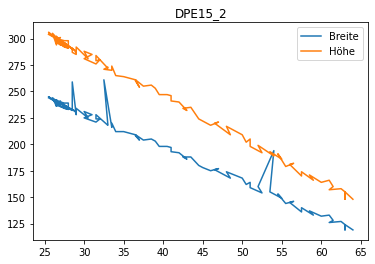

79.46692937230029 106.7546756256077
-31.2916723187062 6.609577433815058

Höhe : Breite  0.8211018932142097
Höhe : Abstand  2.3183183183183185
Breite : Abstand  2.823423423423424
__
1.3826923076923074 1.544423076923077


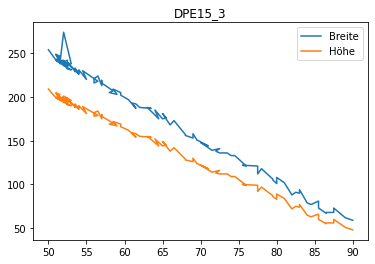

62.07692266065757 86.9976416544095
-25.995093820885867 2.1705748598611407

Höhe : Breite  1.8075642750903038
Höhe : Abstand  6.1496385542168674
Breite : Abstand  3.402168674698795
__
1.6260096153846153 1.0778365384615385


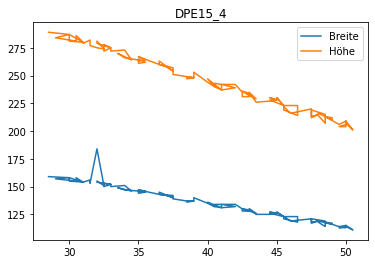

69.43598786121102 86.09821529685841
-25.7112432001267 2.5527801695419043

Höhe : Breite  1.089138802928523
Höhe : Abstand  2.0834536529021084
Breite : Abstand  1.9129367600346523
__
1.3597115384615384 1.3029326923076923


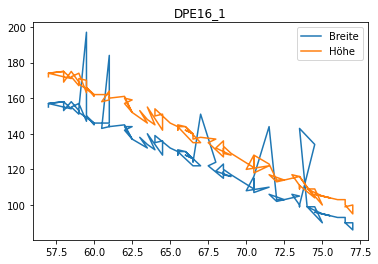

80.75394734980762 101.40327974199121
-0.8390103445769062 4.160868284713044

Höhe : Breite  0.8124701073959738
Höhe : Abstand  3.193915049995727
Breite : Abstand  3.931116998547133
__
1.4609134615384616 1.6682692307692308


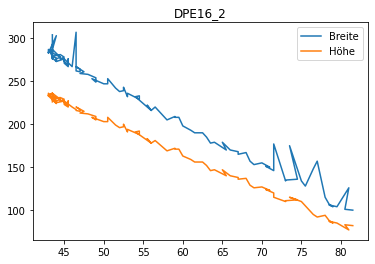

68.10622304948872 110.16778099448905
-35.62563922409232 12.072067232542892

Höhe : Breite  1.0255988898626933
Höhe : Abstand  8.005986316989736
Breite : Abstand  7.806157354618016
__
1.6875480769230768 1.6538461538461537


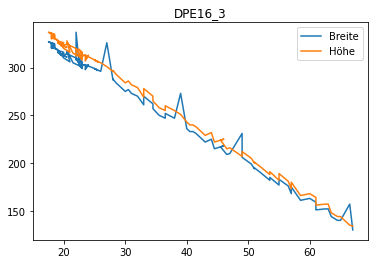

32.15825548278856 52.30255672732508
-7.823825066399181 85.72825824366221

Höhe : Breite  1.9565387117761874
Höhe : Abstand  4.38431258200904
Breite : Abstand  2.240851436069398
__
1.5419014084507041 1.0242253521126756


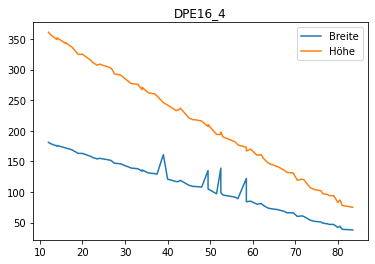

In [4]:
# Plot höhe breite abstand
for path, df in data_dict.items():
    plt.title(path)
    
    plt.plot(df["Abstand(m)"], df["Bbox_Breite"], label="Breite")
    plt.plot(df["Abstand(m)"], df["Bbox_Höhe"], label="Höhe")

    # Verhältnis berechnen
    x, y, z = np.mean(df["Bbox_Höhe"]), np.mean(df["Bbox_Breite"]), np.mean(df["Abstand(m)"])
    val = x / y
    print(df.iloc[10:]["v(km/h) polyfit"].min(), df["v(km/h) polyfit"].max())
    print(df["a(km/h^2)"].min(), df["a(km/h^2)"].max())
    print("")
    print("Höhe : Breite ", val)
    print("Höhe : Abstand ", (x / z))
    print("Breite : Abstand ", (y / z))

    print("__")
    print(np.mean(df["height"]), np.mean(df["width"]))

    plt.legend()
    plt.show()

In [5]:

def choose(df, title):
    # Auswertung
    handler = DempsterHandler()
    handler.add_categories(["Auto", "LKW", "Motorrad", "Fahrrad"])

    """
    TODO:
        * For schleife für alle.
        * "dynamische" regeln.

        * Richtige Höhe / Breite bestimmen (aus Abstand).
    """

    # Test
    x, y, z = np.mean(df["Bbox_Höhe"]), np.mean(df["Bbox_Breite"]), np.mean(df["Abstand(m)"]) 
    val = x / y

    # Geschwindigkeit
    if df["v(km/h) polyfit"].max() >= 60:
        handler.add_measure([
            Measure(["Auto", "LKW", "Motorrad"], 0.6)
        ])

    # Beschleunigung
    if df["a(km/h^2)"].max() >= 10:
        handler.add_measure([
            Measure(["Motorrad"], 0.7)
        ])

    # Größe : Breite
    if val >= 1.1:
        handler.add_measure([
            Measure(["Motorrad", "LKW", "Fahrrad"], 0.7)
        ])
    elif val < 1:
        handler.add_measure([
            Measure(["Auto"], 0.9)
        ])

    # Fehler da iwo
    cumulative = handler.accumulate_all_measures()
    pls = []
    for category in handler.categories:
        p = cumulative.plausibility(category)
        pls.append(p)
        print(category, p)

    plt.title(title)
    plt.xlabel("Kategorien")
    plt.ylabel("Plausibilität")
    plt.bar(handler.categories, pls)
    plt.show()

# WANTED
for name, df in data_dict.items():
    choose(df, name)

NameError: name 'Measure' is not defined